In [1]:
import data_manager
import numpy as np

In [4]:
a=np.zeros((2,2))

In [6]:
my_matcher=data_manager.WordMatcher(a,['\''])
my_matcher.has_punctuation

True

In [12]:
from skimage import io
import parser
import numpy as np

skip_toggle_source=io.imread('/home/gael/Documents/python_projects/handwriting_recognition/handwriting_recognition/skip_button/skip_button.png')
skip_toggle_source.shape
# green=np.where(skip_toggle_source)
skip_toggle_source.dtype


dtype('uint8')

74088 69065.0
70843.0


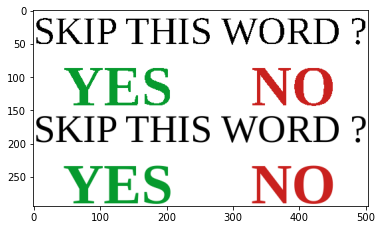

In [70]:
black=(skip_toggle_source[:,:,0]<100) & (skip_toggle_source[:,:,1]<100)
print(black.size,black.size-np.sum(black.astype('uint8')))
green=(skip_toggle_source[:,:,0]<50) & ~black
print(green.size-np.sum(green.astype('uint8')))

red=(skip_toggle_source[:,:,1]<100) & ~black
def exact_color(mono_place,image):
    if not np.any(mono_place):
        raise ValueError('mono_place has no front pixel!')
    found_colors=[]
    color_counts=[]
    for p in zip(*np.where(mono_place)):
        current_color=list(image[p])
        if current_color in found_colors:
            current_index=found_colors.index(current_color)
            color_counts[current_index]+=1
        else:
            found_colors.append(current_color)
            color_counts.append(1)
    max_count=max(color_counts)
    majoritary_index=color_counts.index(max_count)
    return np.array(found_colors[majoritary_index])

def colored(places,colors):
    depth=colors[0].size
    shape=places[0].shape+(depth,)
    output=255*np.ones(shape,dtype='uint8')
    for i in range(len(colors)):
        output[places[i]]=colors[i]
    return output


exact_green=exact_color(green,skip_toggle_source)
exact_red=exact_color(red,skip_toggle_source)
exact_black=exact_color(black,skip_toggle_source)
recipee=[[green,black,red],[exact_green,exact_black,exact_red]]
from matplotlib import pyplot
pyplot.imshow(np.vstack([colored(*recipee),skip_toggle_source]))

In [42]:
A=np.array([[1,2],[3,4]])

In [47]:
B=np.array([True,False])
for p in B:
    print(p)

True
False


In [45]:
A

array([[1, 2],
       [5, 5]])

In [54]:
list(zip(*np.where(A>1)))

[(0, 1), (1, 0), (1, 1)]

In [52]:
list(zip([[1,2],[10,20]]))

[([1, 2],), ([10, 20],)]

In [ ]:
i=2
while True:
    i+=1
    print('blah',i)
    if i>5:
        break